In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


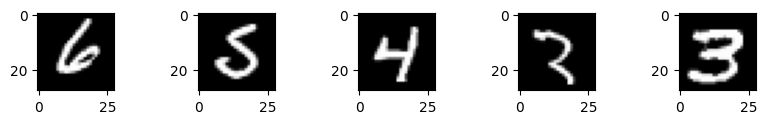

In [5]:
plt.figure(figsize=(10, 1))
for i in range(5):
    rand_indx = np.random.randint(1000)
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[rand_indx],cmap = 'gray')

In [6]:
x_train_og = x_train
x_test_og = x_test

x_train = x_train / 255
x_test = x_test / 255

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [8]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train)



1875/1875 [==============================] - 8s 3ms/step - loss: 0.2724 - accuracy: 0.9208


In [10]:
predictions = model.predict(x_test[15:25])

1/1 [==============================] - 0s 210ms/step


In [11]:
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]

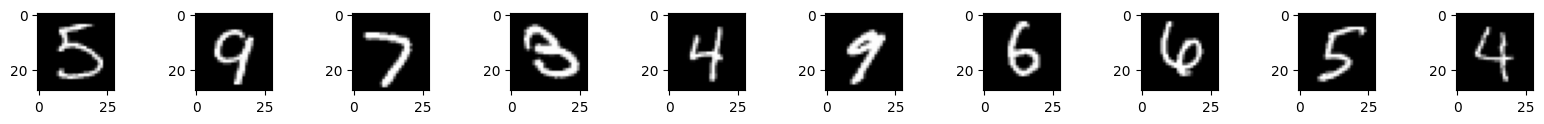

In [12]:
plt.figure(figsize=(20, 1))
for i,j in enumerate(range(15,25)):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[j],cmap = 'gray')

In [13]:
print(predicted_labels)

[5, 9, 7, 3, 4, 9, 6, 6, 5, 4]


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1429 - accuracy: 0.9576
Test loss: 0.14288094639778137
Test accuracy: 0.9575999975204468
